#**Business Understanding**

Sebelum memutuskan daftar perjalanan, seseorang perlu memiliki gambaran tentang tempat-tempat tersebut.

Yogyakarta memiliki lebih dari cukup destinasi wisata, tetapi bagaimana situasi pariwisata setelah covid-19? Pada bulan Oktober 2021, sektor pariwisata di Indonesia mulai bangkit setelah jeda pandemi.

Proyek ini berisi destinasi wisata top-n di Yogyakarta berdasarkan pengguna lokal, penilaian, dan tempat.

##Import Library

In [40]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Set1')
sns.set()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
import os

##Dataset Info

Note:
* tourism_with_id.csv - berisi informasi tentang 5 kota besar di Indonesia, untuk kasus ini, hanya Yogyakarta yang akan digunakan
* user.csv - berisi informasi pengguna untuk membuat fitur rekomendasi
* tourism_rating.csv - berisi informasi pengguna, tujuan wisata, dan penilaian untuk membuat sistem rekomendasi berdasarkan penilaian

#**Data Understanding**

## Load Dataset

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
rating = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Project sistem rekomendasi/dataset_wisata/tourism_rating.csv')
place = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Project sistem rekomendasi/dataset_wisata/tourism_with_id.csv')
user = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Project sistem rekomendasi/dataset_wisata/user.csv')

##Eksplorasi Fitur Data

In [43]:
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [44]:
place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


In [45]:
# Tampilkan hanya Yogyakarta
place = place[place['City']=='Yogyakarta']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203


In [46]:
place.loc[:, ['Time_Minutes']].mean(axis = 0)

,0
Time_Minutes,78.416667


In [47]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 84 to 209
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    int64  
 1   Place_Name    126 non-null    object 
 2   Description   126 non-null    object 
 3   Category      126 non-null    object 
 4   City          126 non-null    object 
 5   Price         126 non-null    int64  
 6   Rating        126 non-null    float64
 7   Time_Minutes  60 non-null     float64
 8   Coordinate    126 non-null    object 
 9   Lat           126 non-null    float64
 10  Long          126 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.8+ KB


In [48]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [49]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [50]:
# ubah data rating sehingga akan berisi rating tujuan di Yogyakarta

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


In [51]:
rating.shape

(2871, 3)

In [52]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [53]:
# ubah data responden menjadi pengunjung tujuan Yogyakarta

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
101,1,"Semarang, Jawa Tengah",20
0,2,"Bekasi, Jawa Barat",21
25,3,"Cirebon, Jawa Barat",23
69,4,"Bekasi, Jawa Barat",21
717,5,"Lampung, Sumatera Selatan",20


In [54]:
# mencari dataset responden yang memberikan penilaian untuk destinasi di Yogyakarta
user.shape

(300, 3)

##Explorasi Data

In [55]:
# mengubah penamaan menjadi bahasa Inggris
place.Category[place.Category == 'Taman Hiburan'] = 'Amusement Park & Downtown Attractions'
place.Category[place.Category == 'Budaya'] = 'Culture'
place.Category[place.Category == 'Cagar Alam'] = 'National Park'
place.Category[place.Category == 'Taman Hiburan'] = 'Amusement Park'
place.Category[place.Category == 'Bahari'] = 'Marine Tourism'
place.Category[place.Category == 'Pusat Perbelanjaan'] = 'Shopping Center'

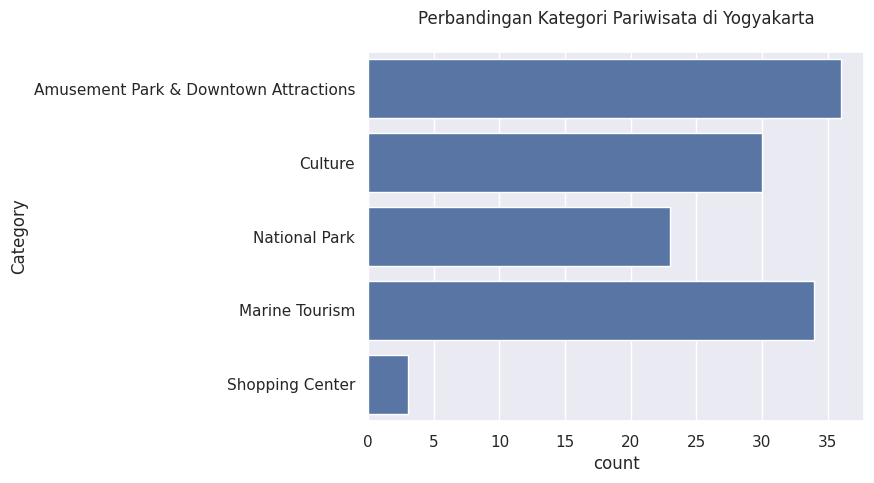

In [56]:
# membuat visualisasi kategori jumlah untuk destinasi Yogyakarta
sns.countplot(y='Category', data=place)
plt.title('Perbandingan Kategori Pariwisata di Yogyakarta', pad=20)
plt.show()

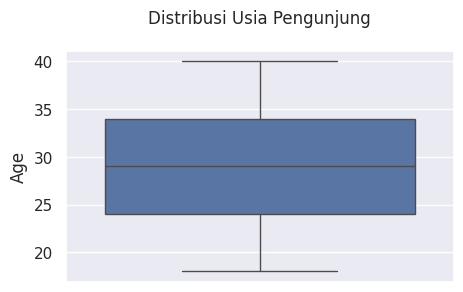

In [57]:
# memvisualisasikan distribusi pengunjung
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia Pengunjung', pad=20)
plt.show()

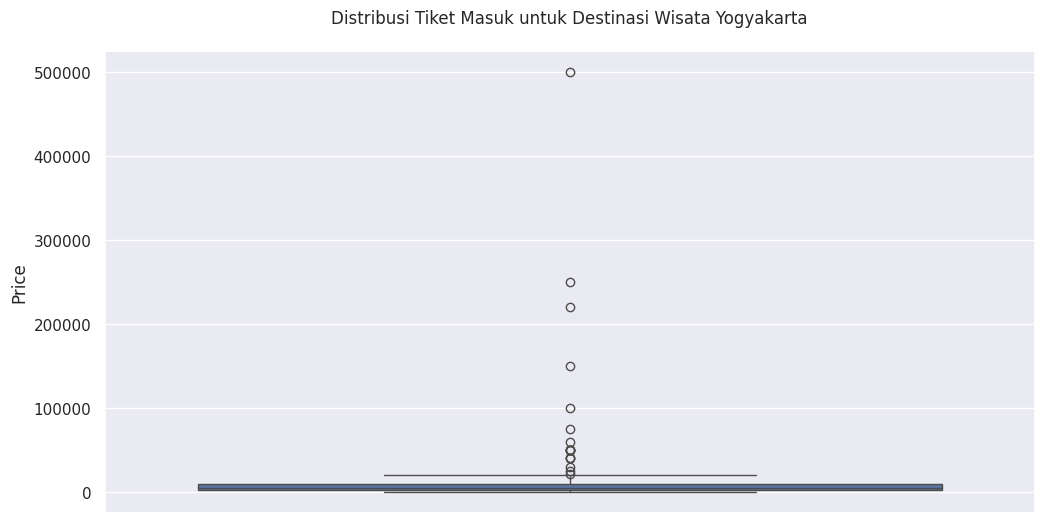

In [58]:
# memvisualisasikan rentang biaya masuk untuk tujuan
plt.figure(figsize=(12,6))
sns.boxplot(place['Price'])
plt.title('Distribusi Tiket Masuk untuk Destinasi Wisata Yogyakarta', pad=20)
plt.show()

In [59]:
# Mengagregasi Harga dan Waktu_Detik untuk kategori tujuan
place.groupby("Category").agg({"Price":["mean", "sum"],
                       "Time_Minutes":["mean", "sum"]})

Price         Time_Minutes  \
                                               mean     sum         mean   
Category                                                                   
Amusement Park & Downtown Attractions  13069.444444  470500    78.409091   
Culture                                33083.333333  992500    79.666667   
Marine Tourism                          7470.588235  254000    85.000000   
National Park                          31934.782609  734500    75.937500   
Shopping Center                            0.000000       0    60.000000   

                                               
                                          sum  
Category                                       
Amusement Park & Downtown Attractions  1725.0  
Culture                                1195.0  
Marine Tourism                          510.0  
National Park                          1215.0  
Shopping Center                          60.0

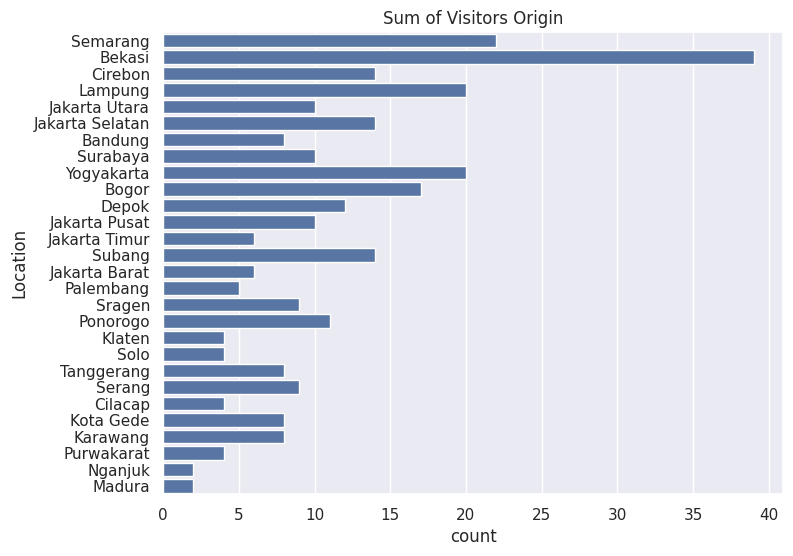

In [60]:
# memfilter asal kota pengunjung
askot = user['Location'].apply(lambda x : x.split(',')[0])

# memvisualisasikan asal kota pengunjung
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Sum of Visitors Origin')
plt.show()

#**Data Preparation**

##Membuat Salinan untuk Penilaian Data

In [61]:
# membaca dataset untuk encoding
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


##Encoding

In [62]:
def dict_encoder(col, data=df):

  # mengubah kolom dataframe menjadi daftar dengan nilai unik
  unique_val = data[col].unique().tolist()

  # mengenumerasi nilai kolom dari dataframe
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # proses encoding dari angka ke nilai kolom dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [63]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dalam dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [64]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dalam dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

##Melihat Gambaran Umum Modelling Data

In [65]:
# mendapatkan panjang user & user
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# mengubah rating menjadi float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# mendapatkan rating minimum dan maksimum
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 126, Min Rating: 1.0, Max Rating: 5.0


In [66]:
# mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
729,194,115,4.0,130,30
2067,276,176,2.0,23,91


#**Modelling**

##Mengalokasikan data train dan test

In [67]:
# membuat variabel x untuk mencocokkan user menjadi satu nilai
x = df[['user', 'place']].values

# membuat variabel y untuk memulai rating
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# mengalokasikan data training 80% & data validation 20%
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

##Model Preparation

In [68]:
class RecommenderNet(tf.keras.Model):

  # Function initialization
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # layer embedding 4

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [69]:
model = RecommenderNet(num_users, num_place, 50) # model initialization

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [70]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Fulfilled expected validation matrix')
      self.model.stop_training = True

In [71]:
# training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 0.7205 - root_mean_squared_error: 0.3703 - val_loss: 0.7045 - val_root_mean_squared_error: 0.3490
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.7207 - root_mean_squared_error: 0.3684 - val_loss: 0.7042 - val_root_mean_squared_error: 0.3488
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.7224 - root_mean_squared_error: 0.3728 - val_loss: 0.7045 - val_root_mean_squared_error: 0.3490
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.7088 - root_mean_squared_error: 0.3634 - val_loss: 0.7042 - val_root_mean_squared_error: 0.3488
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7093 - root_mean_squared_error: 0.3614 - val_loss: 0.7040 - val_root_mean_squared_error: 0.3486
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6981 - root_mean_squared_error: 0.3531 - val_loss: 0.7043 - val_root_mean_squared_error: 0.3489
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

#Evaluation Model

In [83]:
# Ambil data dari objek history
history_df = pd.DataFrame(history.history)

# Tambahkan kolom epoch
history_df['Epoch'] = history_df.index + 1

# Ubah nama kolom agar sesuai format yang diinginkan
formatted_df = history_df.rename(columns={
    'root_mean_squared_error': 'Train RMSE',
    'val_root_mean_squared_error': 'Validation RMSE',
    'loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# Urutkan kolom sesuai permintaan
formatted_df = formatted_df[[
    'Epoch',
    'Train RMSE',
    'Validation RMSE',
    'Train Loss',
    'Validation Loss'
]]

# Tampilkan tabel
print("Hasil Evaluasi Model:\n")
print(formatted_df.to_string(index=False))

Hasil Evaluasi Model:

 Epoch  Train RMSE  Validation RMSE  Train Loss  Validation Loss
     1    0.366521         0.349023    0.716301         0.704503
     2    0.363573         0.348781    0.711988         0.704152
     3    0.365608         0.349022    0.714627         0.704516
     4    0.359749         0.348802    0.705729         0.704211
     5    0.361803         0.348645    0.709092         0.703978
     6    0.356099         0.348899    0.700344         0.704339
     7    0.360907         0.348745    0.707846         0.704104
     8    0.356685         0.348944    0.701699         0.704405
     9    0.357647         0.348513    0.702701         0.703779
    10    0.354727         0.348342    0.698443         0.703532
    11    0.356701         0.348804    0.701304         0.704194
    12    0.355501         0.348943    0.699673         0.704402
    13    0.351486         0.348703    0.693572         0.704074
    14    0.352849         0.348704    0.695687         0.704061
  

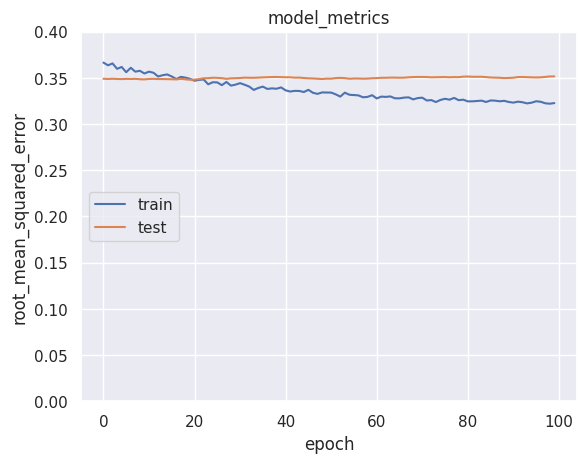

In [72]:
# menunjukkan plot loss and validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

#Prediksi 7 Destinasi yang direkomendasikan

##Persiapan DataFrame untuk Menampilkan Rekomendasi

In [73]:
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

##Contoh user untuk Menampilkan Rekomendasi

In [74]:
# user sampling
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [75]:
# data location yang belum dikunjungi
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

##Menampilkan Rekomendasi untuk user

In [76]:
# top 7 Rekomendasi
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating tertinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 rekomendasi tempat')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Entrance Fee', row.price, ',', 'Rating', row.rating,'\n')

print('==='*15)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Daftar rekomendasi untuk: User 232

------------------------------------------------------------
Tempat dengan rating tertinggi dari user
------------------------------------------------------------
Kampung Wisata Sosro Menduran : Culture
Gumuk Pasir Parangkusumo : Amusement Park & Downtown Attractions
Watu Lumbung : National Park
Pantai Drini : Marine Tourism
Pantai Wediombo : Marine Tourism

------------------------------------------------------------
Top 7 rekomendasi tempat
------------------------------------------------------------
1 . Monumen Yogya Kembali 
     Culture , Entrance Fee 15000 , Rating 4.5 

2 . Bukit Bintang Yogyakarta 
     Amusement Park & Downtown Attractions , Entrance Fee 25000 , Rating 4.5 

3 . Pantai Baron 
     Marine Tourism , Entrance Fee 10000 , Rating 4.4 

4 . Pintoe Langit Dahromo 
     National Park , Entrance Fee 2500 , Rating 4.4 

5 . Museum Gunung Merapi 
     Culture , Entrance Fee 10000 , Rating 4.4 

6 .